# Lightkurve was recently updated (V2) and has a super useful function now called "search_lightcurve"
# To install the updated version of Lightkurve, you can do so with pip: 
## python -m pip install lightkurve --upgrade
# You can view the documentation at: https://docs.lightkurve.org/index.html

# Exoplanet is a MCMC package based in PyMC3 that has many nifty functions and distributions available to model transits (or RV data) with
# To install exoplanet, you can also do so with pip:
## python -m pip install -U exoplanet
# You can view the documentation at: https://docs.exoplanet.codes/en/latest/

In [1]:
# Note: Lightkurve may overwrite some packages and brake other packages dependant on matplotlib, stats or pymc3.

In [2]:
#importing needed packages
import lightkurve as lk
import exoplanet as xo
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import corner

# how to use "search_lightcurve" function from lightkurve: 
# Let's use Pi Mensae c as an example

In [3]:
search_result = lk.search_lightcurve("Pi Mensae", author="SPOC")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 04,2018,SPOC,120,261136679,0.0
2,TESS Sector 08,2019,SPOC,120,261136679,0.0
3,TESS Sector 11,2019,SPOC,120,261136679,0.0
4,TESS Sector 12,2019,SPOC,120,261136679,0.0
5,TESS Sector 13,2019,SPOC,120,261136679,0.0
6,TESS Sector 27,2020,SPOC,20,261136679,0.0
7,TESS Sector 27,2020,SPOC,120,261136679,0.0
8,TESS Sector 28,2020,SPOC,20,261136679,0.0


# for a list of "authors" like "SPOC", "QLP" and others, you can find them at https://archive.stsci.edu/hlsp/

In [4]:
# we have a few light curves available (2 short cadence ones and one long cadence ones).
# let's use just sector 1 data since that's what was used to find Pi Mensae c
# https://arxiv.org/pdf/1809.05967.pdf

S1 = search_result[0].download()
ID = search_result[0].target_name[0]

In [5]:
# what kind of file types are these?
print(type(S1))

<class 'lightkurve.lightcurve.TessLightCurve'>


# read more about what you can do with LightCurve objects here:
https://docs.lightkurve.org/tutorials/1-getting-started/what-are-lightcurve-objects.html?highlight=tesslightcurve

In [6]:
#what columns of data are stored in LightCurve objects from SPOC data?

S1

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1325.2969832846081,1.4360288e+06,1.3034833e+02,1.2319793e-03,70445,1630.68328,260.57838,1.3612392e+06,1.2409460e+02,6.5837310e+03,1.0833917e+01,1.4360288e+06,1.3034833e+02,0,nan,nan,nan,nan,1630.68328,7.7958597e-05,260.57838,1.3379561e-04,9.0832964e-02,-7.3513225e-02
1325.2983721541343,1.4369764e+06,1.3075061e+02,1.2319605e-03,70446,1630.65829,260.55770,1.3698750e+06,1.2447758e+02,6.5981660e+03,1.0844648e+01,1.4369764e+06,1.3075061e+02,0,nan,nan,nan,nan,1630.65829,7.7436758e-05,260.55770,1.3489836e-04,6.1537281e-02,-1.1010910e-01
1325.2997610236596,1.4368839e+06,1.3078423e+02,1.2319416e-03,70447,1630.65773,260.55380,1.3705072e+06,1.2450958e+02,6.6324717e+03,1.0866501e+01,1.4368839e+06,1.3078423e+02,0,nan,nan,nan,nan,1630.65773,7.7415745e-05,260.55380,1.3495631e-04,6.1100267e-02,-1.1602790e-01
1325.3011498931862,1.4369045e+06,1.3083818e+02,1.2319228e-03,70448,1630.65765,260.54270,1.3717208e+06,1.2456096e+02,6.6239849e+03,1.0863663e+01,1.4369045e+06,1.3083818e+02,0,nan,nan,nan,nan,1630.65765,7.7329001e-05,260.54270,1.3508328e-04,6.0148858e-02,-1.2854427e-01
1325.3025387628288,1.4372622e+06,1.3090010e+02,1.2319040e-03,70449,1630.65108,260.54597,1.3730455e+06,1.2461990e+02,6.6222939e+03,1.0857074e+01,1.4372622e+06,1.3090010e+02,0,nan,nan,nan,nan,1630.65108,7.7243691e-05,260.54597,1.3525633e-04,5.2834075e-02,-1.2819707e-01
1325.303927632354,1.4373374e+06,1.3092467e+02,1.2318852e-03,70450,1630.65034,260.54597,1.3735555e+06,1.2464330e+02,6.6193745e+03,1.0856522e+01,1.4373374e+06,1.3092467e+02,0,nan,nan,nan,nan,1630.65034,7.7244105e-05,260.54597,1.3525982e-04,5.1683158e-02,-1.2800191e-01
1325.3053165019971,1.4371032e+06,1.3090388e+02,1.2318664e-03,70451,1630.65441,260.53878,1.3730798e+06,1.2462350e+02,6.6485552e+03,1.0873725e+01,1.4371032e+06,1.3090388e+02,0,nan,nan,nan,nan,1630.65441,7.7262062e-05,260.53878,1.3521196e-04,5.6143098e-02,-1.3325982e-01
1325.3067053715233,1.4372719e+06,1.3089941e+02,1.2318476e-03,70452,1630.65258,260.54360,1.3729671e+06,1.2461924e+02,6.6366045e+03,1.0870914e+01,1.4372719e+06,1.3089941e+02,0,nan,nan,nan,nan,1630.65258,7.7251520e-05,260.54360,1.3524268e-04,5.4269131e-02,-1.2979764e-01


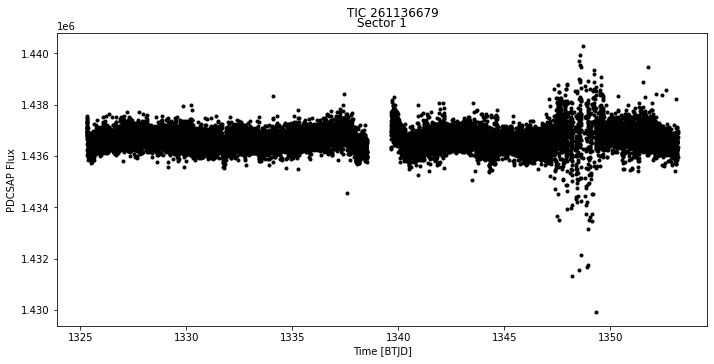

In [7]:
# what do our light curves look like using the PDCSAP corrected flux?

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)

ax1.plot(S1.time.value,S1.pdcsap_flux.value,'k.')

ax1.set_ylabel('PDCSAP Flux')
ax1.set_xlabel('Time [BTJD]')

ax1.set_title('Sector 1')
fig.suptitle('TIC '+str(ID),x=0.55,y=1.0)

fig.tight_layout(pad=1)
plt.show()

# let's clean up our light curves by removing the non-zero quality flags

In [8]:
mnotzero1 = np.where(S1.quality.value!=0)[0]
mzero1 = np.where(S1.quality.value==0)[0]
print('number of non zero quality flags',len(mnotzero1))
print('number of zero quality flags',len(mzero1))

# data from 1347 - 1350 is known to be bad telescope jitter in Sector 1, let's remove that as well

newS1 = lk.LightCurve(time=S1.time.value[mzero1],\
                      flux=S1.pdcsap_flux.value[mzero1],\
                      flux_err=S1.pdcsap_flux_err.value[mzero1])

mtime = (newS1.time.value < 1347) | (newS1.time.value > 1350)

newS1 = lk.LightCurve(time=newS1.time.value[mtime],\
                      flux=newS1.flux.value[mtime],\
                      flux_err=newS1.flux_err.value[mtime])

number of non zero quality flags 50
number of zero quality flags 18054


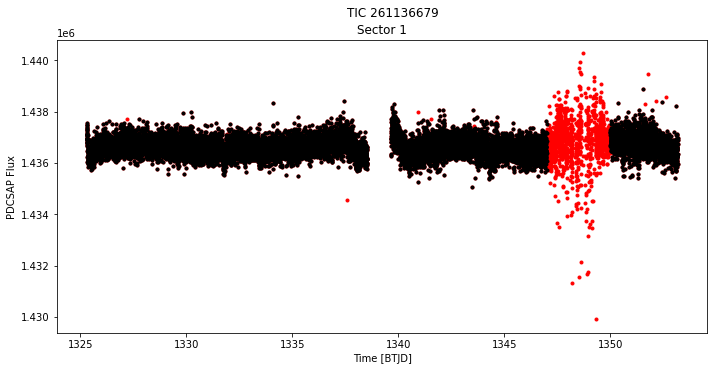

In [9]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)

ax1.plot(S1.time.value,S1.pdcsap_flux.value,'r.',zorder=-10)
ax1.plot(newS1.time.value,newS1.flux.value,'k.',zorder=10)

ax1.set_ylabel('PDCSAP Flux')
ax1.set_xlabel('Time [BTJD]')

ax1.set_title('Sector 1')

fig.suptitle('TIC '+str(ID),x=0.55,y=1.02)

fig.tight_layout(pad=1)
plt.show()


# let's try to remove long term trends with a savitsky-golay filter and outlier rejection. We'll use a window size of 1001 points (number has to be odd) which corresponds to a window of about 1.4 days

# with outlier rejection, we'll remove flares and other outliers > 3 standard deviations but keep outliers below to not truncate any transits

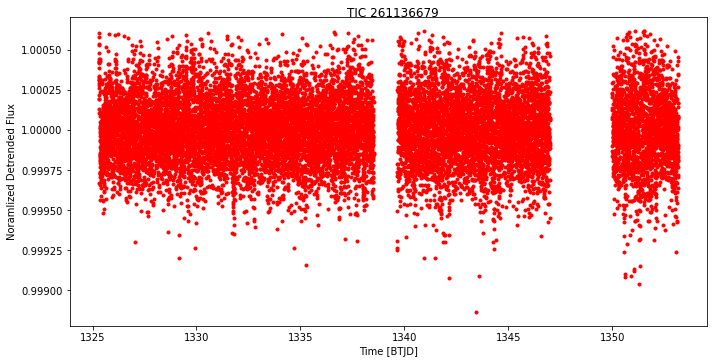

In [10]:

window_size = 1001
S1_smoothed = newS1.flatten(window_length=window_size,polyorder=3).normalize()

S1_cleaned = S1_smoothed.remove_outliers(sigma_upper=3,sigma_lower=np.inf)


fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)

ax1.plot(S1_cleaned.time.value,S1_cleaned.flux.value,'r.',zorder=-10)

ax1.set_ylabel('Noramlized Detrended Flux')
ax1.set_xlabel('Time [BTJD]')

fig.suptitle('TIC '+str(ID),x=0.55,y=1.0)

fig.tight_layout(pad=1)
plt.show()

# Now we can run a blind transit search. Let's see if we can recover Pi Mensae c!

In [11]:
import time as clock
start=clock.time()
bls_result = S1_cleaned.to_periodogram('bls',minimum_period=1.01)
print('transit search runtime: ',(clock.time() - start)/60,'minutes')

transit search runtime:  0.0133392333984375 minutes


# for a lot of data points, this might take a while.

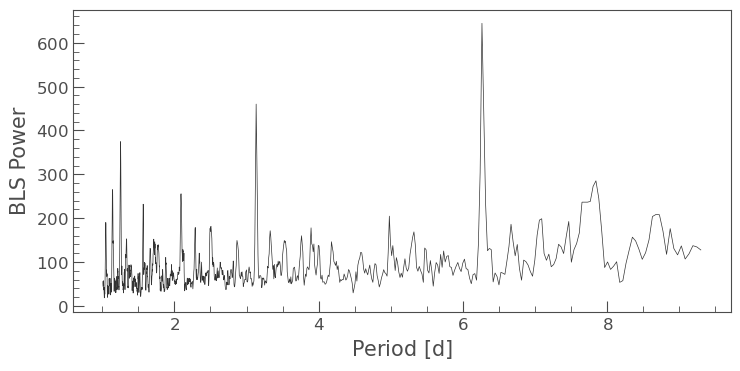

In [12]:
bls_result.plot()
plt.show()

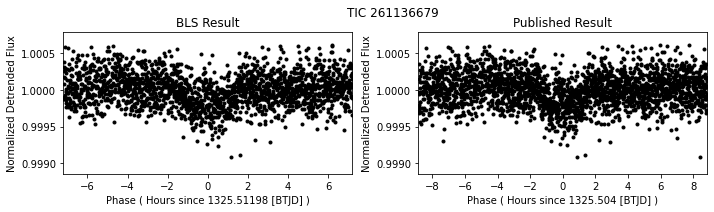

In [27]:


BLS_P = bls_result.period_at_max_power.value #in days 
BLS_T0 = bls_result.transit_time_at_max_power.value # in BTJD
BLS_Dur = bls_result.duration_at_max_power.value*24 #from days to hours

#how do these compare with the Published parameters from https://arxiv.org/pdf/1809.05967.pdf
Pub_P  = 6.2679 #days 
Pub_T0 = 2458325.50400 - 2457000 #from BJD to BTJD
Pub_Dur = 2.953 #hours



#let's phasefold our light curves and check how they look

def phasefold(T0,time,period,flux):
    phase=(time- T0 + 0.5*period) % period - 0.5*period        
    ind=np.argsort(phase, axis=0)
    return phase[ind],flux[ind]

Pubpf , Pubff = phasefold(Pub_T0,np.array(S1_cleaned.time.value),Pub_P,np.array(S1_cleaned.flux.value))
BLSpf , BLSff = phasefold(BLS_T0,np.array(S1_cleaned.time.value),BLS_P,np.array(S1_cleaned.flux.value))


fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

ax1.plot(24*BLSpf , BLSff, 'k.')
ax2.plot(24*Pubpf , Pubff, 'k.')

ax1.set_ylabel('Normalized Detrended Flux')
ax2.set_ylabel('Normalized Detrended Flux')
ax1.set_xlabel('Phase ( Hours since '+str(np.round(BLS_T0,5))+' [BTJD] )')
ax2.set_xlabel('Phase ( Hours since '+str(np.round(Pub_T0,5))+' [BTJD] )')

ax1.set_title('BLS Result')
ax2.set_title('Published Result')

ax1.set_xlim(-3*BLS_Dur,3*BLS_Dur)
ax2.set_xlim(-3*Pub_Dur,3*Pub_Dur)



m1 = np.where(np.abs(24*BLSpf)<BLS_Dur)[0]
m2 = np.where(np.abs(24*Pubpf)<BLS_Dur)[0]
ax1.set_ylim(np.min(BLSff[m1])-np.std(BLSff[m1]),np.max(BLSff[m1])+np.std(BLSff[m1]))
ax2.set_ylim(np.min(Pubff[m2])-np.std(Pubff[m2]),np.max(Pubff[m2])+np.std(Pubff[m2]))

fig.suptitle('TIC '+str(ID),x=0.55,y=1.0)

fig.tight_layout(pad=1)
plt.show()



In [14]:
print('Published Results')
print('P',Pub_P,'days')
print('T0',Pub_T0,'BTJD')
print('Duration',Pub_Dur,'Hours')

print(' ')
print('BLS Results')
print('P',BLS_P,'days')
print('T0',BLS_T0,'BTJD')
print('Duration',BLS_Dur,'Hours')

Published Results
P 6.2679 days
T0 1325.50400000019 BTJD
Duration 2.953 Hours
 
BLS Results
P 6.263285636859489 days
T0 1325.511983284608 BTJD
Duration 2.4000000000000004 Hours


# Pretty close!

# Let's see if we can further constrain our transit parameters in addition to the orbital inclination with the functions from the Pymc3_4_parameter_MCMC_TransitFit 

In [15]:
from Pymc3_4_parameter_MCMC_TransitFit import MCMC_transit_fit, Make_dir

In [16]:
ID

'261136679'

In [17]:
import os
savedestinationpath=os.getcwd()+'/MCMC_fit/'

ID=int(ID); Sector=1

#first make directory to store summary figures and data
savepath = Make_dir(ID,Sector,path=savedestinationpath)

# Let's set up a input transit parameter file

In [18]:

cadence=np.nanmedian(np.diff(S1_cleaned.time.value))
tdur = int((BLS_Dur/24)/cadence) # in units of cadences
print(tdur)
CDPP = S1_cleaned.estimate_cdpp(transit_duration=tdur,savgol_window=window_size,savgol_polyorder=3).value #in ppm

#let's use transitleastsquares' catalog_info function to look up TIC params
from transitleastsquares import catalog_info
qld, M_star, M_star_min, M_star_max, R_star, R_star_min, R_star_max = catalog_info(TIC_ID=ID)
RSerr = (R_star_min+R_star_max)/2.0
MSerr = (M_star_min+M_star_max)/2.0

import math
Time_span = np.max(S1_cleaned.time.value)-np.min(S1_cleaned.time.value)
N_transits = np.round(Time_span/BLS_P)

BLS_Depth = (bls_result.depth_at_max_power) # = (RP/RS)^2

import astropy.units as u
BLS_RP = np.sqrt(BLS_Depth) * (R_star*(u.R_sun.to(u.cm))) / (u.R_earth.to(u.cm)) # in earth units 

RP_RS = (BLS_RP*u.R_earth.to(u.cm) ) / (R_star*(u.R_sun.to(u.cm)))

Time_span = np.max(S1_cleaned.time.value)-np.min(S1_cleaned.time.value)
N_transits = np.round(Time_span/BLS_P)


input_Transit_params = pd.DataFrame({'Period':BLS_P, \
                                   'Period Error':np.nan,\
                                   'T0':BLS_T0,\
                                   'Duration':BLS_Dur,\
                                  'Planet Radius':BLS_RP,\
                                  'Planet Radius Error':np.nan,\
                                  'RP_RS':RP_RS,'RP_RSerr':np.nan,\
                                   'qld_a':qld[0],'qld_b':qld[1],'R_star':R_star,'M_star':M_star, \
                                   'N_transits':N_transits, 'CDPP [ppm]':CDPP, 'Time span':Time_span},index=[0])
input_Transit_params

72


,Period,Period Error,T0,Duration,Planet Radius,Planet Radius Error,RP_RS,RP_RSerr,qld_a,qld_b,R_star,M_star,N_transits,CDPP [ppm],Time span
0,6.263286,NaN,1325.511983,2.4,1.652344,NaN,0.013185,NaN,0.3345,0.2282,1.14889,1.1,4.0,47.289542,27.880105


In [19]:
#let's reformat our input lightcurve as a dataframe
input_LC = pd.DataFrame({'Time':S1_cleaned.time.value,'Flux':S1_cleaned.flux.value,\
                         "Flux Error":S1_cleaned.flux_err.value})

# Now we can set the number of iterations our MCMC will perform and the number of draws it'll do for each iteration.

# We can also set an oversampling factor to account for any smearing in the light curve due to the cadence (more important for long cadence data rather than short cadence)

In [20]:
Niters=2000
Ndraws=2000
OS=5

MCMC_transit_fit(ID,Sector,input_LC,input_Transit_params, savedestinationpath, Niters=Niters, Ndraws=Ndraws,OS=OS)

initializing MCMC model


optimizing logp for variables: [b, r, R_star, M_star, u, logP, t0, mean]


0it [00:00, ?it/s]

message: Desired error not necessarily achieved due to precision loss.
logp: 96530.11505399148 -> 96812.91063775169
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


 
Initialization complete. Runtime  1.2271404981613159  minutes
 
Sampling Posteriors


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, r, R_star, M_star, u, logP, t0, mean]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 1314 seconds.


 
Best-fit MCMC parameters: 
P =  0.021329541503126492 6.263127866874903 0.02225009514724796
T0 =  0.10426518859048883 1325.5143079711916 0.10122177913854102
RP =  0.10054418277176524 1.6171708845029749 0.10025328017956747
b =  0.07444073875004775 0.6195048385437225 0.05800947093477282
/Users/Dax/Desktop/TESS/Tutorials/lightkurve_to_exoplanet/MCMC_fit/Sector_1/TIC_261136679/pymc3/TIC_261136679_Sector_1_MCMC_bestfit_parameters.csv
Total runtime  23.90096330245336  minutes
 
Finished!



In [21]:
print("And that's how it's done!")

And that's how it's done!
